"Weather 
( Sumber: https://www.wunderground.com/history/daily/us/ca/burbank/KBUR/date/2022-5-1 )"


Buatlah model untuk memprediksi rata rata kecepatan angin pada suatu hari dengan menggunakan data rata-rata kecepatan angin harian dari tanggal 01 Januari 2020 hingga 01 Januari 2022

# Import library

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 1000)
pd.set_option('max_columns', 100)
import requests
import json
from matplotlib import pyplot as plt

%matplotlib inline
figsize = (25,5)

# Web extraction from API

In [ ]:
def get_data_api(api):
    '''
    Get API result
    '''
    response = requests.get(api)
    return json.loads(response.content)

In [ ]:
# generate dates from 1 Jan 2020 - 1 Jan 2022
day = 1
month = 1
year = 2020
dates = []
for i in range(2):
  for i in range(1,13):

    # get maxDate per month
    awal = i < 8
    if i == 2:
      maxDate = 29 if year%4 == 0 else 28
    elif awal:
      maxDate = 31 if i%2 == 1 else 30
    else:
      maxDate = 30 if i%2 == 1 else 31

    for i in range(1,maxDate+1):
      startDate = f'{year}{str(month).zfill(2)}{str(day).zfill(2)}'
      dates.append(startDate)
      day += 1

    month += 1
    day = 1
    
  year += 1
  month = 1

dates.append('20220101')
dates

['20200101',
 '20200102',
 '20200103',
 '20200104',
 '20200105',
 '20200106',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200112',
 '20200113',
 '20200114',
 '20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210',
 '20200211',
 '20200212',
 '20200213',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',

In [ ]:
len(dates)

732

In [ ]:
avg_data = []
for d in dates:
  api = f'https://api.weather.com/v1/location/KBUR:9:US/observations/historical.json?apiKey=e1f10a1e78da46f5b10a1e78da96f525&units=e&startDate={d}'
  data = get_data_api(api)

  try:
    daily = data["observations"]
    wspd_data = [] # data per hour
    for day in daily:
      wspd_data.append(day["wspd"])

    # handle no record on certain hour
    wspd_data = list(filter(None, wspd_data))
    # get avg wind speed data
    avg = sum(wspd_data)/len(wspd_data)
  except:
    # handle day with no recorded data with null values
    avg = None
  avg_data.append([d, avg])

In [ ]:
df = pd.DataFrame(avg_data, columns=['Date','Avg Wind Speed'])
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.head(10)

,Date,Avg Wind Speed
0,2020-01-01,5.294118
1,2020-01-02,6.538462
2,2020-01-03,5.222222
3,2020-01-04,4.333333
4,2020-01-05,6.846154
5,2020-01-06,5.421053
6,2020-01-07,4.214286
7,2020-01-08,5.105263
8,2020-01-09,6.666667
9,2020-01-10,6.000000


# EDA

In [ ]:
df.head(10)

,Date,Avg Wind Speed
0,2020-01-01,5.294118
1,2020-01-02,6.538462
2,2020-01-03,5.222222
3,2020-01-04,4.333333
4,2020-01-05,6.846154
5,2020-01-06,5.421053
6,2020-01-07,4.214286
7,2020-01-08,5.105263
8,2020-01-09,6.666667
9,2020-01-10,6.000000


In [ ]:
df.shape

(732, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            732 non-null    datetime64[ns]
 1   Avg Wind Speed  731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


In [ ]:
df.describe()

,Avg Wind Speed
count,731.000000
mean,6.810134
std,1.730566
min,3.333333
25%,5.666667
50%,6.666667
75%,7.500000
max,16.583333


In [ ]:
print(df['Avg Wind Speed'].isnull().values.any())
print(df['Avg Wind Speed'].isnull().sum())

True
1


Terdapat null values sehingga perlu dilakukan preprocessing untuk menanganinya.

# Preprocessing

## Handle Missing Values

In [ ]:
df[df['Date'] == '2020-11-08']

,Date,Avg Wind Speed
312,2020-11-08,NaN


In [ ]:
# handle missing values with interpolation
df['Interpolation'] = df['Avg Wind Speed'].interpolate(option='spline')
df.head(10)

,Date,Avg Wind Speed,Interpolation
0,2020-01-01,5.294118,5.294118
1,2020-01-02,6.538462,6.538462
2,2020-01-03,5.222222,5.222222
3,2020-01-04,4.333333,4.333333
4,2020-01-05,6.846154,6.846154
5,2020-01-06,5.421053,5.421053
6,2020-01-07,4.214286,4.214286
7,2020-01-08,5.105263,5.105263
8,2020-01-09,6.666667,6.666667
9,2020-01-10,6.000000,6.000000


In [ ]:
df[df['Date'] == '2020-11-08']

,Date,Avg Wind Speed,Interpolation
312,2020-11-08,NaN,6.717949


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.head()

,Date,Avg Wind Speed,Interpolation
0,2020-01-01,5.294118,5.294118
1,2020-01-02,6.538462,6.538462
2,2020-01-03,5.222222,5.222222
3,2020-01-04,4.333333,4.333333
4,2020-01-05,6.846154,6.846154


In [ ]:
def normalize_df(df_col):
  # prepare data for normalization
  values = df_col.values
  values = values.reshape((len(values), 1))
  # train the normalization
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler = scaler.fit(values)
  print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
  # normalize the dataset and print the first 5 rows
  normalized = scaler.transform(values)
  for i in range(5):
    print(normalized[i])
  # inverse transform and print the first 5 rows
  inversed = scaler.inverse_transform(normalized)
  for i in range(5):
    print(inversed[i])

  return normalized

In [ ]:
df_norm = df.copy()
df_norm['Interpolation'] = normalize_df(df_norm['Interpolation'])
df_norm['Avg Wind Speed'] = normalize_df(df_norm['Avg Wind Speed'])

Min: 3.333333, Max: 16.583333
[0.14798372]
[0.24189647]
[0.14255765]
[0.0754717]
[0.26511853]
[5.29411765]
[6.53846154]
[5.22222222]
[4.33333333]
[6.84615385]
Min: 3.333333, Max: 16.583333
[0.14798372]
[0.24189647]
[0.14255765]
[0.0754717]
[0.26511853]
[5.29411765]
[6.53846154]
[5.22222222]
[4.33333333]
[6.84615385]


In [ ]:
df_norm.head()

,Date,Avg Wind Speed,Interpolation
0,2020-01-01,0.147984,0.147984
1,2020-01-02,0.241896,0.241896
2,2020-01-03,0.142558,0.142558
3,2020-01-04,0.075472,0.075472
4,2020-01-05,0.265119,0.265119


# Time Series Characteristic

In [ ]:
df_2020 = df[df['Date'].astype(str).str.contains('2020')]
df_2021 = df[df['Date'].astype(str).str.contains('2021')]

### Rolling Mean & Rolling Std

In [ ]:
df_rolling = df.copy()
df_rolling['Rolling Mean'] = df_rolling['Interpolation'].rolling(7).mean()
df_rolling['Rolling Std'] = df_rolling['Interpolation'].rolling(7).std()
df_rolling

,Date,Avg Wind Speed,Interpolation,Rolling Mean,Rolling Std
0,2020-01-01,5.294118,5.294118,NaN,NaN
1,2020-01-02,6.538462,6.538462,NaN,NaN
2,2020-01-03,5.222222,5.222222,NaN,NaN
3,2020-01-04,4.333333,4.333333,NaN,NaN
4,2020-01-05,6.846154,6.846154,NaN,NaN
...,...,...,...,...,...
727,2021-12-28,6.866667,6.866667,7.095709,2.212365
728,2021-12-29,12.000000,12.000000,8.220709,2.440456
729,2021-12-30,10.511111,10.511111,8.153669,2.357031
730,2021-12-31,6.043478,6.043478,8.088451,2.415991


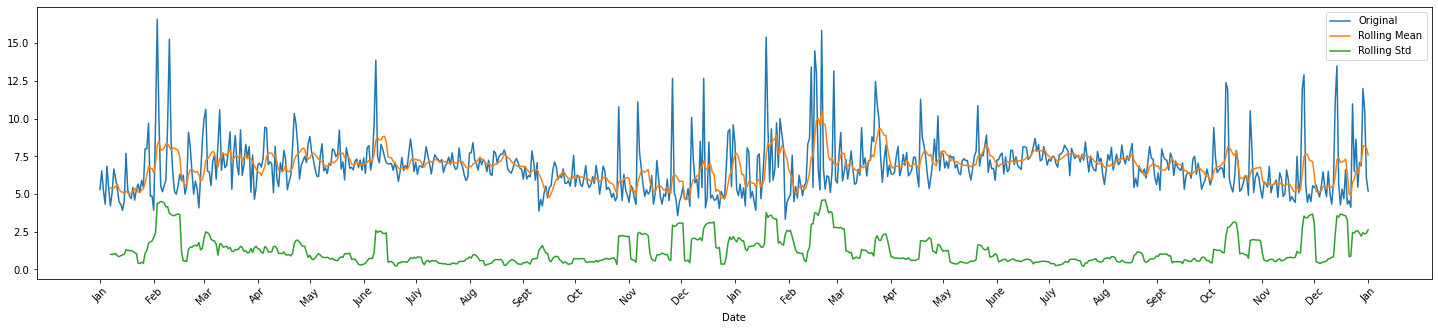

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df_rolling['Date'].dt.strftime('%Y-%m-%d'), df_rolling['Interpolation'], label='Original')
plt.plot(df_rolling['Date'].dt.strftime('%Y-%m-%d'), df_rolling['Rolling Mean'], label='Rolling Mean')
plt.plot(df_rolling['Date'].dt.strftime('%Y-%m-%d'), df_rolling['Rolling Std'], label='Rolling Std')
plt.xticks(rotation = 45)

pos = [ '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
       '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
       '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01']
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan']

plt.xticks(pos,lab)
plt.xlabel('Date')
plt.legend()
plt.show()

Dari grafik di atas, secara sekilas terlihat bahwa data tersebut stasioner. Hal ini dikarenakan grafik tersebut tidak menunjukkan trend yang konsisten, melainkan cukup stabil, sehingga dapat dikatakan stasioner.

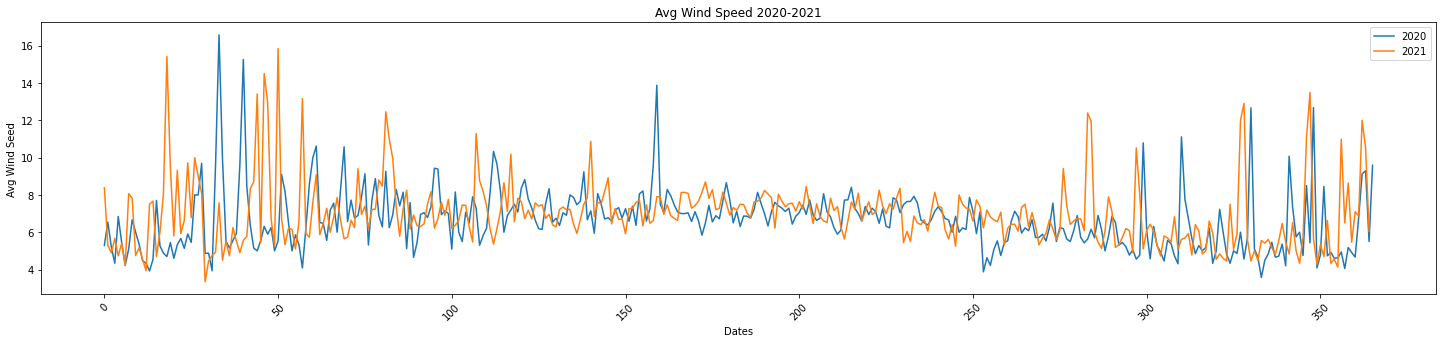

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(df_2020['Interpolation'].reset_index().index, df_2020['Interpolation'], label="2020")
plt.plot(df_2021['Interpolation'].reset_index().index, df_2021['Interpolation'], label="2021")
plt.xticks(rotation = 45)
plt.ylabel('Avg Wind Seed')
plt.xlabel('Dates')
plt.title('Avg Wind Speed 2020-2021')
plt.legend()
plt.show()

## Stationary Test

https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
# Call the function and run the test
adf_test(df['Interpolation'])

Results of Dickey-Fuller Test:
Test Statistic                -7.369066e+00
p-value                        9.072579e-11
#Lags Used                     6.000000e+00
Number of Observations Used    7.250000e+02
Critical Value (1%)           -3.439402e+00
Critical Value (5%)           -2.865535e+00
Critical Value (10%)          -2.568897e+00
dtype: float64


Hasil dari ADF test tersebut menunjukkan bahwa nilai Test Statistic lebih kecil dibandingkan dengan seluruh nilai Critical Value, serta nilai p-value lebih kecil dari 0.05. Hal ini mengimplikasikan bahwa data termasuk **stationary**.

# Modeling

## ARIMA

### Determine p,d,q values

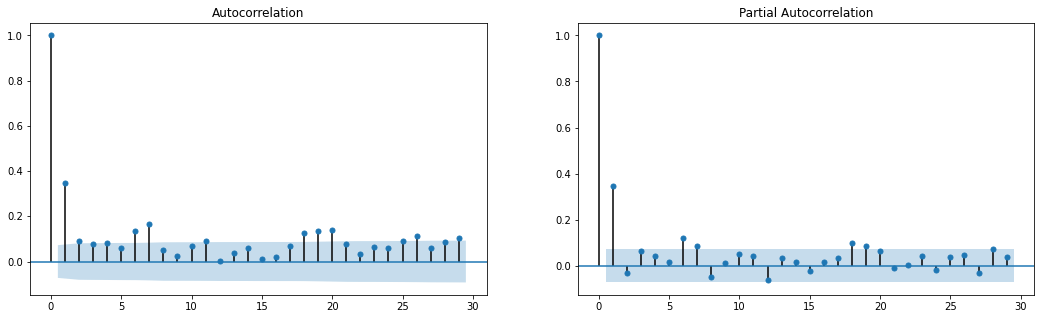

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f = plt.figure(figsize=(18,5))
ax1 = f.add_subplot(121)
plot_acf(df['Interpolation'], ax=ax1)
ax2 = f.add_subplot(122)
plot_pacf(df['Interpolation'], ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Interpolation'])
print(f'p-value: {result[1]}')

p-value: 9.072579454025724e-11


- Karena sudah stasioner, ambil nilai d = 0
- Karena pada PACF terlihat pada lag 1 paling significant, maka dipilih p = 1
- Sedangkan pada ACF, lag 1 juga terlihat significant, namun karena lag 2 juga masih melebihi limit significat jadi kami memilih untuk mencoba dengan value q = 2

ref: https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

### Menggunakan data asli

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import math
# Create Training and Test
train_size = math.floor(len(df['Interpolation'])*0.7)
train = df['Interpolation'][:train_size]
test = df['Interpolation'][train_size:]
print(train_size)

512


In [ ]:
# 1,0,2 ARIMA Model
model = ARIMA(train, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          Interpolation   No. Observations:                  512
Model:                     ARMA(1, 2)   Log Likelihood                -992.777
Method:                       css-mle   S.D. of innovations              1.681
Date:                Thu, 16 Jun 2022   AIC                           1995.555
Time:                        13:57:42   BIC                           2016.747
Sample:                             0   HQIC                          2003.862
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.7923      0.296     22.981      0.000       6.213       7.372
ar.L1.Interpolation     0.9850      0.012     82.989      0.000       0.962       1.008
ma.L1.Interpolat

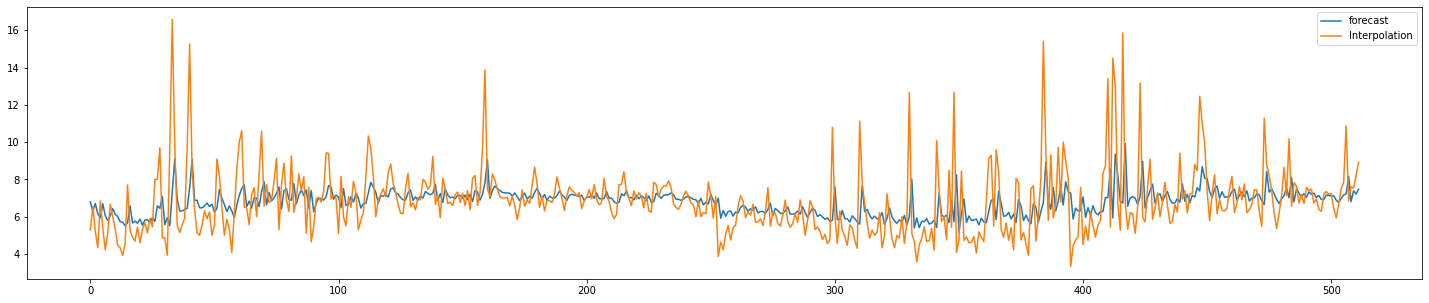

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

In [ ]:
test_size = len(df['Interpolation']) - train_size

In [ ]:
# Forecast
fc, se, conf = model_fit.forecast(test_size, alpha=0.05)  # 95% conf

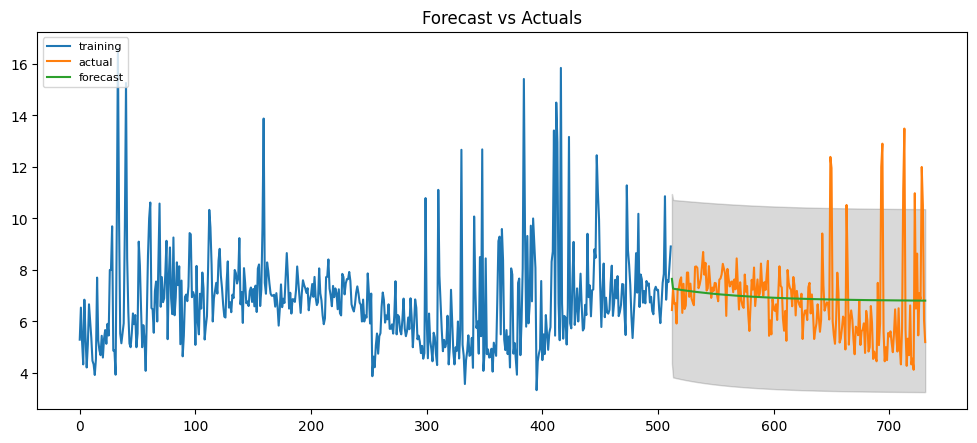

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc, test.values)

{'acf1': 0.3725479111697005,
 'corr': 0.219093904527635,
 'mae': 1.0536524061484398,
 'mape': 0.1609093106667966,
 'me': 0.13473257106151676,
 'minmax': 0.13505923690681254,
 'mpe': 0.06378429987071177,
 'rmse': 1.5057733312094088}

### Menggunakan data normalized

In [ ]:
# Create Training and Test
train_size = math.floor(len(df_norm['Interpolation'])*0.7)
train = df_norm['Interpolation'][:train_size]
test = df_norm['Interpolation'][train_size:]
print(train_size)

512


In [ ]:
# 1,0,2 ARIMA Model
model = ARIMA(train, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:          Interpolation   No. Observations:                  512
Model:                     ARMA(1, 2)   Log Likelihood                 330.229
Method:                       css-mle   S.D. of innovations              0.127
Date:                Thu, 16 Jun 2022   AIC                           -650.459
Time:                        13:57:43   BIC                           -629.267
Sample:                             0   HQIC                          -642.151
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2611      0.022     11.703      0.000       0.217       0.305
ar.L1.Interpolation     0.9850      0.012     82.988      0.000       0.962       1.008
ma.L1.Interpolat

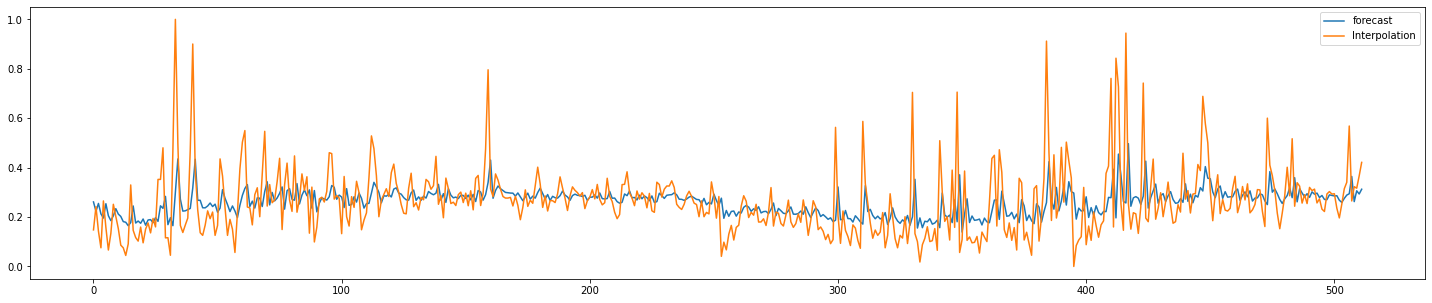

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

In [ ]:
test_size = len(df_norm['Interpolation']) - train_size

In [ ]:
# Forecast
fc, se, conf = model_fit.forecast(test_size, alpha=0.05)  # 95% conf

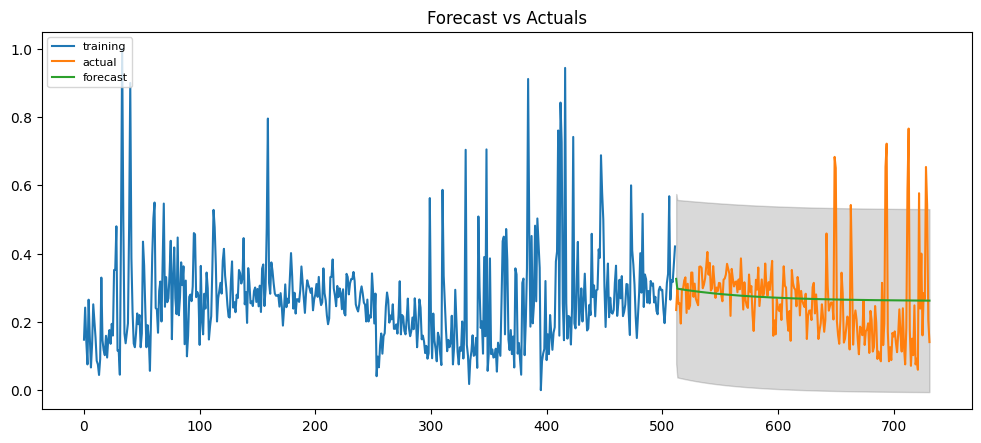

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast_accuracy(fc, test.values)

{'acf1': 0.37254797780777216,
 'corr': 0.21909352399878054,
 'mae': 0.07952094084280265,
 'mape': 0.4101969738888334,
 'me': 0.010168436521076327,
 'minmax': 0.24598899771107807,
 'mpe': 0.2544299996252178,
 'rmse': 0.11364327123830775}

## SARIMA

### Menggunakan data asli

In [ ]:
df.head()

,Date,Avg Wind Speed,Interpolation
0,2020-01-01,5.294118,5.294118
1,2020-01-02,6.538462,6.538462
2,2020-01-03,5.222222,5.222222
3,2020-01-04,4.333333,4.333333
4,2020-01-05,6.846154,6.846154


In [ ]:
df_copy_2 = df.copy()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
ts = df['Interpolation']

In [ ]:
df.head()

,Avg Wind Speed,Interpolation
Date,,
2020-01-01,5.294118,5.294118
2020-01-02,6.538462,6.538462
2020-01-03,5.222222,5.222222
2020-01-04,4.333333,4.333333
2020-01-05,6.846154,6.846154


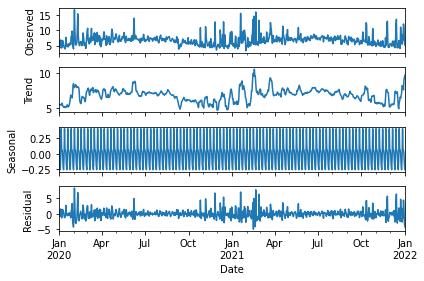

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [ ]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


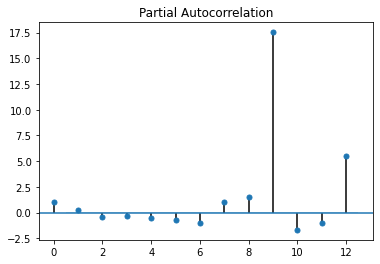

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags =12)
plt.show()

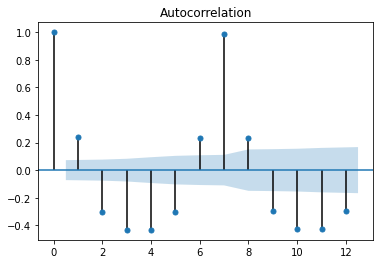

In [ ]:
plot_acf(seasonal, lags =12)
plt.show()

In [ ]:
ts_train = ts[:'2021-10-01']
ts_test = ts['2021-10-01':]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
p =1 
d = 0
q = 2


In [ ]:
P = 1
D = 0
Q = 1

In [ ]:
model_seasonal = SARIMAX(ts_train, order=(p,d,q), seasonal_order=(P,D,Q,7))
model_fit_seasonal = model_seasonal.fit()

In [ ]:
print(model_fit_seasonal.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Interpolation   No. Observations:                  640
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 7)   Log Likelihood               -1186.406
Date:                           Thu, 16 Jun 2022   AIC                           2384.812
Time:                                   13:58:01   BIC                           2411.581
Sample:                               01-01-2020   HQIC                          2395.202
                                    - 10-01-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001    870.522      0.000       0.998       1.002
ma.L1         -0.6890      0.023    -29.541

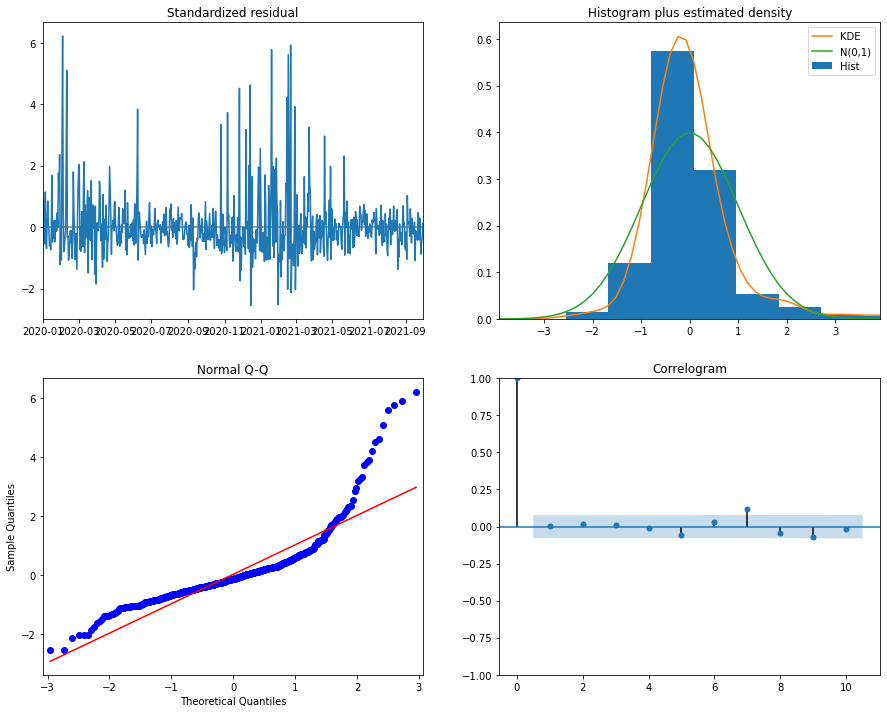

In [ ]:
model_fit_seasonal.plot_diagnostics(figsize=(15,12));

In [ ]:
df_res = df.copy()

In [ ]:
model_seasonal = SARIMAX(df['Interpolation'], order=(p,d,q), seasonal_order=(P,D,Q,7))
model_fit_seasonal = model_seasonal.fit()

In [ ]:
print(model_fit_seasonal.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Interpolation   No. Observations:                  732
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 7)   Log Likelihood               -1385.851
Date:                           Thu, 16 Jun 2022   AIC                           2783.703
Time:                                   13:58:05   BIC                           2811.277
Sample:                               01-01-2020   HQIC                          2794.340
                                    - 01-01-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9996      0.001    746.399      0.000       0.997       1.002
ma.L1         -0.6612      0.023    -29.069

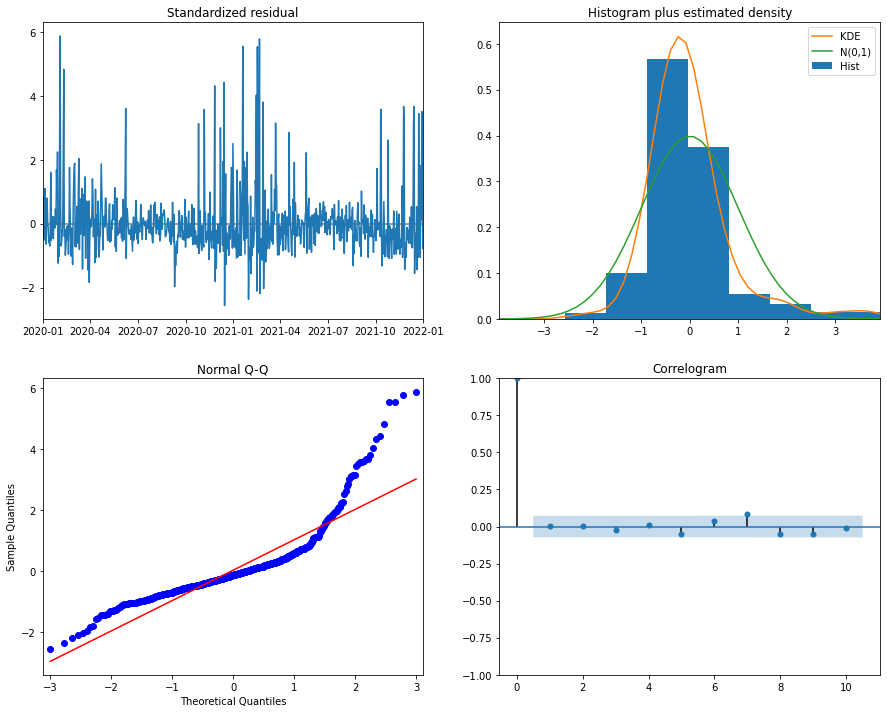

In [ ]:
model_fit_seasonal.plot_diagnostics(figsize=(15,12));

In [ ]:
df_res = df.copy()

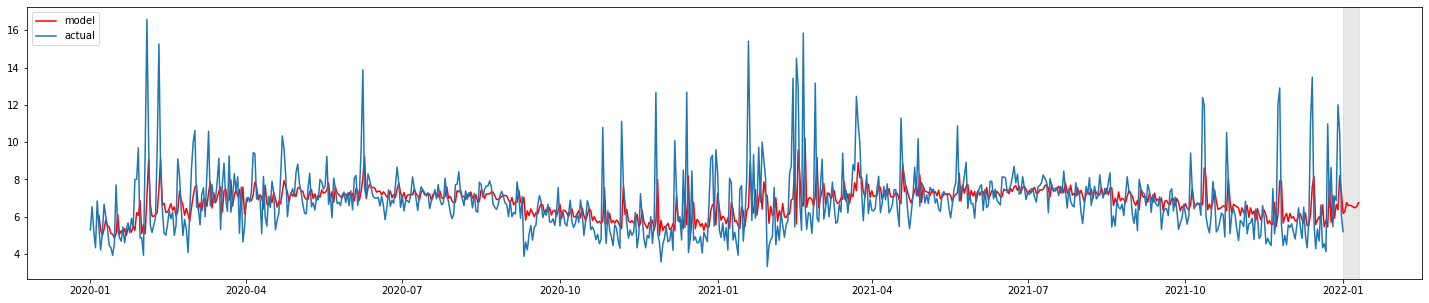

In [ ]:
df_res['sarima_model'] = model_fit_seasonal.fittedvalues
df_res['sarima_model'][:4+1] = np.NaN
forecast = model_fit_seasonal.predict(start=df_res.shape[0], end=df_res.shape[0] + 8)
forecast = df_res['sarima_model'].append(forecast)
plt.figure(figsize=(25, 5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(df_res.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(df_res['Interpolation'], label='actual')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
forecast[:8]

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06    6.062197
2020-01-07    5.296812
2020-01-08    4.989012
dtype: float64

In [ ]:
rmse(forecast[5:-3], df['Interpolation'][5])

1.554430204060829

### Menggunakan data normalized

In [ ]:
df_norm.head()

,Date,Avg Wind Speed,Interpolation
0,2020-01-01,0.147984,0.147984
1,2020-01-02,0.241896,0.241896
2,2020-01-03,0.142558,0.142558
3,2020-01-04,0.075472,0.075472
4,2020-01-05,0.265119,0.265119


In [ ]:
df_norm_copy = df_norm.copy()

In [ ]:
df_norm['Date'] = pd.to_datetime(df_norm['Date'])
df_norm.set_index('Date', inplace=True)
ts = df_norm['Interpolation']

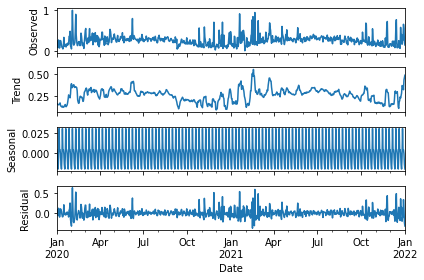

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

Dari hasil decompose tersebut tampak bahwa terdapat pola seasonal pada data.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

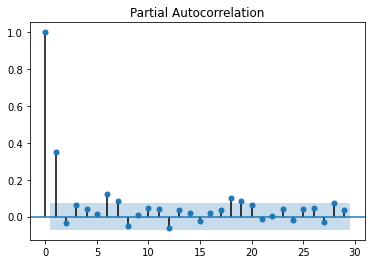

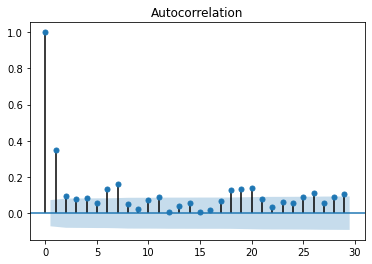

In [ ]:
plot_pacf(df_norm['Interpolation']);
plot_acf(df_norm['Interpolation']);

In [ ]:
ad_fuller_result = adfuller(df_norm['Interpolation'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.369065800989563
p-value: 9.072579454026386e-11


Nilai p-value cukup kecil untuk menolak null hypothesis, dan kita dapat menganggap time series tersebut stasioner.

In [ ]:
model_sarima = SARIMAX(df_norm['Interpolation'], order=(1, 0, 2), seasonal_order=(1, 0, 1, 7)).fit(dis=-1)
print(model_sarima.summary())

                                 Statespace Model Results                                
Dep. Variable:                     Interpolation   No. Observations:                  732
Model:             SARIMAX(1, 0, 2)x(1, 0, 1, 7)   Log Likelihood                 506.441
Date:                           Thu, 16 Jun 2022   AIC                          -1000.881
Time:                                   13:58:10   BIC                           -973.307
Sample:                               01-01-2020   HQIC                          -990.244
                                    - 01-01-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.002    495.877      0.000       0.995       1.003
ma.L1         -0.6578      0.023    -28.970

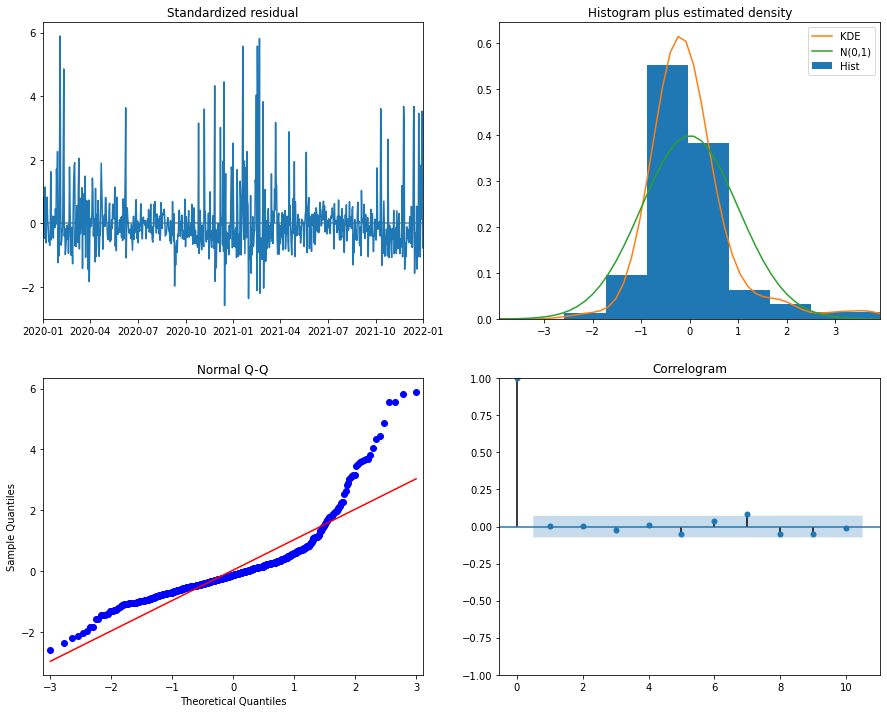

In [ ]:
model_sarima.plot_diagnostics(figsize=(15,12));

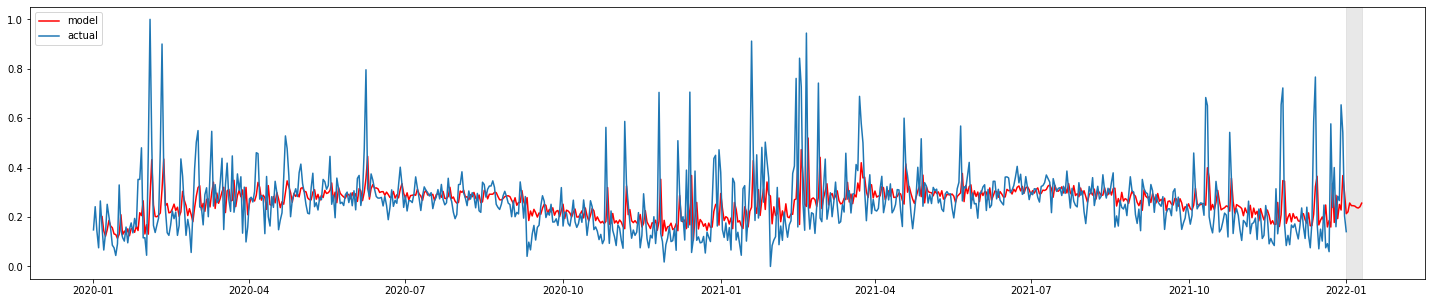

In [ ]:
df_norm['sarima_model'] = model_sarima.fittedvalues
df_norm['sarima_model'][:4+1] = np.NaN

forecast = model_sarima.predict(start=df_norm.shape[0], end=df_norm.shape[0] + 8)
forecast = df_norm['sarima_model'].append(forecast)

plt.figure(figsize=(25, 5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(df_norm.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(df_norm['Interpolation'], label='actual')
plt.legend()
plt.show()

In [ ]:
forecast[:8]

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
2020-01-06    0.201710
2020-01-07    0.144187
2020-01-08    0.122078
dtype: float64

In [ ]:
rmse(forecast[5:-9], df_norm['Interpolation'][5:])

0.12111227920593934